In [1]:
import pandas as pd

In [2]:
df_players = pd.read_csv('data/clusters_with_labels.csv')
df_players.head()

,id,player_name,team_name,Points,Points per player's possession,Field goals made,Field goals attempted,"Field goals, %",2-pt field goals made,2-pt field goals attempted,...,Right drives,"Right drives made, %",Left drives made,Left drives,"Left drives made, %",Opp Drives shots made,Opp Drives shots,"Opponent Drives shots made, %",minutes_in_seconds,Cluster_Labels
0,0,Jordan McRae,Hapoel SP Tel Aviv,0.323011,0.098485,0.146392,1.526017,-0.355960,-0.301946,-0.116089,...,0.404777,-0.932415,1.206362,1.586438,-0.183693,-0.476008,-0.239608,-0.622679,1.158308,15
1,1,Xavier Munford,Hapoel SP Tel Aviv,-0.119143,0.114373,-0.411176,1.060169,-0.384085,-0.998388,-0.875851,...,1.030772,-0.482878,0.727194,1.327334,-0.142203,1.092025,1.051366,0.403170,1.049630,15
2,2,J'Covan Brown,Hapoel SP Tel Aviv,-0.445170,-0.302963,-0.743531,0.766967,-0.804552,-1.465262,-1.141860,...,0.044589,-1.604921,1.030667,1.301423,0.362364,-1.006727,-1.223448,-1.174764,0.970262,15
3,3,Tomer Ginat,Hapoel SP Tel Aviv,-0.423616,0.317041,-0.168574,0.988058,0.043033,-0.112789,-0.083979,...,0.319018,-1.445177,-0.383261,0.048262,-1.680184,0.218981,-0.562251,0.506441,0.800923,15
4,4,Idan Zalmanson,Hapoel SP Tel Aviv,-1.245993,-0.144148,-1.104310,0.117196,0.095209,-0.897791,-0.831268,...,-0.209661,-2.554343,-0.550590,-0.218656,-1.985201,0.054711,-0.332423,0.487821,-0.253715,15


In [3]:
initial_conversion_dict={
    'T. Ben Moshe':'T. Moshe',
    'R. Yitshak Menco': 'R. Menco',
    'G. Aharon Beni':'G. Beni',
    'A. Demian Ariel':'A. Ariel',
    'J. Donne Meyinsse':'J. Meyinsse',
    'I. Adam Dolinski':'I. Dolinski',
    'X. Clifton Williams':'X. Williams',
    'N. Shimon Dovrat':'N. Dovrat',
    'M. Abu Abdul':'M. Abdul'
    
}

list_of_exclude = ['K. Smith','E. Lecomte','N. Dovrat',
                  'R. Odomes','M. Abdul']

In [4]:
def convert_to_intials(full_name):
    full_split = full_name.split()
    first_name = full_split[0]
    if len(full_split)>2:
        last_name = ' '.join(full_split[-2:])
    elif len(full_split)==2:
        last_name = full_split[1]
    elif len(full_split)==1:
        last_name = full_split[0]
    initials = f"{first_name[0]}. {last_name}"
    return initials

df_players['initials'] = df_players['player_name'].apply(lambda x: convert_to_intials(x))

for key in initial_conversion_dict.keys():
    df_players['initials'].replace(key,initial_conversion_dict[key] , inplace=True )

In [5]:


def convert_lineup_to_list_of_labels(lineup):
    try:
        tmp_splt = [' '.join(my_string.lstrip().split(' ')[1:]) for my_string in lineup.split(',')]
        cluster_label_list = []
        for player in tmp_splt:
            
            cluster_label_list.append(df_players[(df_players['initials']==player) & (df_players['team_name'] == team_name) ]['Cluster_Labels'].values[0])
        return cluster_label_list
    except Exception as e:
        return None
        


In [6]:

import pandas as pd

# create ExcelFile object
import os
import glob
import pandas as pd

# set directory path
directory = "data/"

# get list of all files starting with "Players"
files = glob.glob(os.path.join(directory, "Lineups*"))

# initialize empty list to hold DataFrames
data_frames = []
game_id = 0
# iterate over files and read each sheet into a DataFrame
for file in files:
    # print(file)
    
    # read Excel file
    excel_file = pd.ExcelFile(file)
    sheet_names = excel_file.sheet_names
    # iterate over sheets and read into DataFrame
    for sheet in sheet_names:
        team_name = sheet.split('.')[0]
        opp_team  = list(set(sheet_names) - set([sheet]))[0].split('.')[0]
        df = pd.read_excel(excel_file, sheet_name=sheet, index_col=0)
        df['lineup'] = df.index
        df['team_name']      = team_name
        df['opp_team']       = opp_team
        df['lineup_labeled'] = df['lineup'].apply(lambda x: convert_lineup_to_list_of_labels(x))
        df['game_id']        = game_id
#         df.rename(columns= {'Unnamed: 0':'runnning_id',
#                             'Unnamed: 1':'player_name'}, inplace=True)
#         # replace '-' with 0
        df = df.replace('-', 0)
        data_frames.append(df)
    game_id +=1
# # concatenate all DataFrames into one DataFrame
result = pd.concat(data_frames)

# # print the combined DataFrame
# print(result.head())
print('done')

done


In [7]:
# df['Points'].astype(int, errors='ignore')
pd.to_numeric(df['Points'], errors='coerce').sum()
result.to_csv('data/fives_raw.csv')

In [8]:
result.shape

(4474, 28)

In [9]:
tmp = df['lineup'].iloc[1]
team_name,opp_team, tmp
result[result['lineup_labeled'].isnull()].shape, result[~result['lineup_labeled'].isnull()].shape
result

,Plus/Minus,Minutes,Possessions,Points,Field goals attempted,Field goals made,"Field goals, %",2-pt field goals attempted,2-pt field goals made,"2-pt field goals, %",...,Defensive rebounds,Assists,Steals,Turnovers,Fouls,lineup,team_name,opp_team,lineup_labeled,game_id
"2 S. Thompson Jr., 3 Y. Kravitz, 0 G. Levin, 1 S. Cohen III, 20 A. Michaeli",2,01:52,4,4,3,2,67%,2,2,100%,...,2,0,0,1,0,"2 S. Thompson Jr., 3 Y. Kravitz, 0 G. Levin, 1...",Bnei Herzliya,Maccabi Playtika Tel Aviv,"[5, 5, 5, 5, 5]",0
"45 J. Gamble, 2 S. Thompson Jr., 3 Y. Kravitz, 11 A. Van Vliet, 9 M. Kemp",6,04:14,8,12,8,5,63%,7,5,71%,...,3,5,2,0,1,"45 J. Gamble, 2 S. Thompson Jr., 3 Y. Kravitz,...",Bnei Herzliya,Maccabi Playtika Tel Aviv,"[9, 5, 5, 5, 7]",0
"2 S. Thompson Jr., 3 Y. Kravitz, 11 A. Van Vliet, 0 G. Levin, 9 M. Kemp",-3,00:38,1,0,0,0,0,0,0,0,...,0,0,0,1,1,"2 S. Thompson Jr., 3 Y. Kravitz, 11 A. Van Vli...",Bnei Herzliya,Maccabi Playtika Tel Aviv,"[5, 5, 5, 5, 7]",0
"10 O. Brandwein, 2 S. Thompson Jr., 3 Y. Kravitz, 0 G. Levin, 9 M. Kemp",0,01:11,2,2,2,1,50%,1,1,100%,...,1,1,1,0,0,"10 O. Brandwein, 2 S. Thompson Jr., 3 Y. Kravi...",Bnei Herzliya,Maccabi Playtika Tel Aviv,"[5, 5, 5, 5, 7]",0
"45 J. Gamble, 10 O. Brandwein, 21 Q. Hooker, 2 S. Thompson Jr., 0 G. Levin",2,04:36,11,11,7,5,71%,4,4,100%,...,3,2,0,1,3,"45 J. Gamble, 10 O. Brandwein, 21 Q. Hooker, 2...",Bnei Herzliya,Maccabi Playtika Tel Aviv,"[9, 5, 4, 5, 5]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"40 C. Lewis, 2 D. Garrett, 4 K. Mashour, 8 Y. Hanochi, 1 J. Reddic",3,01:55,5,6,4,2,50%,3,2,67%,...,3,1,0,0,0,"40 C. Lewis, 2 D. Garrett, 4 K. Mashour, 8 Y. ...",Ironi Kiryat Ata,Hapoel Gilboa Galil,"[4, 4, 9, 8, 9]",133
"40 C. Lewis, 5 M. Brisker, 4 K. Mashour, 8 Y. Hanochi, 1 J. Reddic",-6,01:37,3,2,2,1,50%,2,1,50%,...,0,0,0,0,2,"40 C. Lewis, 5 M. Brisker, 4 K. Mashour, 8 Y. ...",Ironi Kiryat Ata,Hapoel Gilboa Galil,"[4, 8, 9, 8, 9]",133
"40 C. Lewis, 2 D. Garrett, 5 M. Brisker, 8 Y. Hanochi, 1 J. Reddic",0,00:46,3,2,1,1,100%,1,1,100%,...,0,1,0,2,2,"40 C. Lewis, 2 D. Garrett, 5 M. Brisker, 8 Y. ...",Ironi Kiryat Ata,Hapoel Gilboa Galil,"[4, 4, 8, 8, 9]",133
"40 C. Lewis, 2 D. Garrett, 5 M. Brisker, 3 A. Stevens, 8 Y. Hanochi",-2,00:15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"40 C. Lewis, 2 D. Garrett, 5 M. Brisker, 3 A. ...",Ironi Kiryat Ata,Hapoel Gilboa Galil,"[4, 4, 8, 9, 8]",133


In [10]:
df_players.groupby('Cluster_Labels').size()

Cluster_Labels
0     13
1     13
2     11
3     13
4     21
5     12
6      3
7     11
8     12
9     25
10    12
11    16
12     6
13    10
14     9
15    11
16    10
dtype: int64

In [14]:



def convert_minutes_to_sec(time_str):
    try:
        minutes, seconds = time_str.split(":")
        total_seconds = int(minutes) * 60 + int(seconds)
        return total_seconds
    except Exception as e: 
        print(time_str)
        raise e
def preprocess_data(df):
    # convert minutes
    df                       = df[df['Minutes']!=0]
    df['minutes_in_seconds'] = df['Minutes'].apply(lambda x: convert_minutes_to_sec(x))    
    df                       = df[df['lineup_labeled'].isnull()==False]
    df['lineup_labeled']     = df['lineup_labeled'].apply(lambda x: sorted(x))
    df['key_labels']         = df['lineup_labeled'].apply(lambda x: '-'.join(map(str, x)))
    
    return df


def aggregate_lineup_labeled_data(raw_data,columns_to_cluster_by):
    # aggreate data to an avg 
    avg_player = raw_data.groupby(['key_labels']).mean()[columns_to_cluster_by]
    return avg_player


df = preprocess_data(result)
df.to_csv('data/post_processed/lineup_data_with_id.csv')
agg_df = aggregate_lineup_labeled_data(df,['Plus/Minus', 'minutes_in_seconds', 'Possessions'])
agg_df['mean_plus_minus_per_minute']    = agg_df['Plus/Minus'] / (agg_df['minutes_in_seconds']/60) 
agg_df['mean_plus_minus_per_possesion'] = agg_df['Plus/Minus'] / agg_df['Possessions']
# agg_team_df = aggregate_team_data (df,columns_to_cluster_by)

<ipython-input-14-4da91b1da290>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minutes_in_seconds'] = df['Minutes'].apply(lambda x: convert_minutes_to_sec(x))


In [13]:
df.shape

(4041, 30)

<AxesSubplot:ylabel='Frequency'>

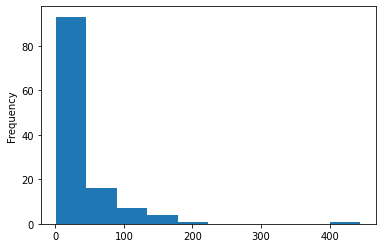

In [11]:
agg_df.sort_values('minutes_in_seconds')
df.groupby('key_labels').size().plot(kind='hist')

In [12]:
agg_df.to_csv('data/agg_df.csv')

In [13]:
agg_df

,Plus/Minus,minutes_in_seconds,Possessions,mean_plus_minus_per_minute,mean_plus_minus_per_possesion
key_labels,,,,,
0-0-0-0-0,-1.000000,68.500000,2.250000,-0.875912,-0.444444
0-0-0-0-4,-0.048780,176.402439,6.426829,-0.016592,-0.007590
0-0-0-0-6,-1.181818,101.090909,3.636364,-0.701439,-0.325000
0-0-0-0-8,-0.243902,168.731707,6.292683,-0.086730,-0.038760
0-0-0-3-3,3.000000,45.000000,2.000000,4.000000,1.500000
...,...,...,...,...,...
5-5-5-5-8,-2.000000,67.000000,2.000000,-1.791045,-1.000000
5-5-5-8-8,0.000000,27.500000,1.000000,0.000000,0.000000
6-6-6-6-6,0.000000,60.500000,1.500000,0.000000,0.000000


In [17]:
df

,Plus/Minus,Minutes,Possessions,Points,Field goals attempted,Field goals made,"Field goals, %",2-pt field goals attempted,2-pt field goals made,"2-pt field goals, %",...,Assists,Steals,Turnovers,Fouls,lineup,team_name,opp_team,lineup_labeled,minutes_in_seconds,key_labels
"2 S. Thompson Jr., 3 Y. Kravitz, 0 G. Levin, 1 S. Cohen III, 20 A. Michaeli",2,01:52,4,4,3,2,67%,2,2,100%,...,0,0,1,0,"2 S. Thompson Jr., 3 Y. Kravitz, 0 G. Levin, 1...",Bnei Herzliya,Maccabi Playtika Tel Aviv,"[0, 0, 0, 6, 6]",112,0-0-0-6-6
"45 J. Gamble, 2 S. Thompson Jr., 3 Y. Kravitz, 11 A. Van Vliet, 9 M. Kemp",6,04:14,8,12,8,5,63%,7,5,71%,...,5,2,0,1,"45 J. Gamble, 2 S. Thompson Jr., 3 Y. Kravitz,...",Bnei Herzliya,Maccabi Playtika Tel Aviv,"[0, 0, 0, 4, 8]",254,0-0-0-4-8
"2 S. Thompson Jr., 3 Y. Kravitz, 11 A. Van Vliet, 0 G. Levin, 9 M. Kemp",-3,00:38,1,0,0,0,0,0,0,0,...,0,0,1,1,"2 S. Thompson Jr., 3 Y. Kravitz, 11 A. Van Vli...",Bnei Herzliya,Maccabi Playtika Tel Aviv,"[0, 0, 0, 4, 6]",38,0-0-0-4-6
"10 O. Brandwein, 2 S. Thompson Jr., 3 Y. Kravitz, 0 G. Levin, 9 M. Kemp",0,01:11,2,2,2,1,50%,1,1,100%,...,1,1,0,0,"10 O. Brandwein, 2 S. Thompson Jr., 3 Y. Kravi...",Bnei Herzliya,Maccabi Playtika Tel Aviv,"[0, 0, 0, 4, 6]",71,0-0-0-4-6
"45 J. Gamble, 10 O. Brandwein, 21 Q. Hooker, 2 S. Thompson Jr., 0 G. Levin",2,04:36,11,11,7,5,71%,4,4,100%,...,2,0,1,3,"45 J. Gamble, 10 O. Brandwein, 21 Q. Hooker, 2...",Bnei Herzliya,Maccabi Playtika Tel Aviv,"[0, 0, 0, 6, 8]",276,0-0-0-6-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"40 C. Lewis, 2 D. Garrett, 4 K. Mashour, 8 Y. Hanochi, 1 J. Reddic",3,01:55,5,6,4,2,50%,3,2,67%,...,1,0,0,0,"40 C. Lewis, 2 D. Garrett, 4 K. Mashour, 8 Y. ...",Ironi Kiryat Ata,Hapoel Gilboa Galil,"[0, 0, 4, 4, 8]",115,0-0-4-4-8
"40 C. Lewis, 5 M. Brisker, 4 K. Mashour, 8 Y. Hanochi, 1 J. Reddic",-6,01:37,3,2,2,1,50%,2,1,50%,...,0,0,0,2,"40 C. Lewis, 5 M. Brisker, 4 K. Mashour, 8 Y. ...",Ironi Kiryat Ata,Hapoel Gilboa Galil,"[0, 0, 0, 4, 8]",97,0-0-0-4-8
"40 C. Lewis, 2 D. Garrett, 5 M. Brisker, 8 Y. Hanochi, 1 J. Reddic",0,00:46,3,2,1,1,100%,1,1,100%,...,1,0,2,2,"40 C. Lewis, 2 D. Garrett, 5 M. Brisker, 8 Y. ...",Ironi Kiryat Ata,Hapoel Gilboa Galil,"[0, 0, 4, 4, 8]",46,0-0-4-4-8
"40 C. Lewis, 2 D. Garrett, 5 M. Brisker, 3 A. Stevens, 8 Y. Hanochi",-2,00:15,0,0,0,0,0,0,0,0,...,0,0,0,0,"40 C. Lewis, 2 D. Garrett, 5 M. Brisker, 3 A. ...",Ironi Kiryat Ata,Hapoel Gilboa Galil,"[0, 0, 4, 4, 8]",15,0-0-4-4-8
